In [1]:
import lightning as L 
import matplotlib.pyplot as plt
import lightning as L
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor, EarlyStopping, StochasticWeightAveraging
import torch 

torch.set_float32_matmul_precision("high")

In [2]:
from src.models.SimpleFC import SimpleFC_Lit
from src.models.FCSplit import FC_Split

In [3]:
import numpy as np

In [14]:
#model = SimpleFC_Lit.load_from_checkpoint("lightning_logs/version_65/checkpoints/epoch=20-step=420000-val_loss=0.00001.ckpt")
#model = SimpleFC_Lit.load_from_checkpoint("lightning_logs/version_12/checkpoints/ttt3.ckpt")
#model = SimpleFC_Lit.load_from_checkpoint("lightning_logs/version_73/checkpoints/epoch=311-step=780000-val_loss=0.00000058.ckpt")

#model = SimpleFC_Lit.load_from_checkpoint("lightning_logs/version_81/checkpoints/epoch=5-step=15000-val_loss=0.05296911.ckpt")
#model = SimpleFC_Lit.load_from_checkpoint("lightning_logs/version_82/checkpoints/epoch=11-step=30000-val_loss=0.01132153.ckpt")

model = SimpleFC_Lit.load_from_checkpoint("lightning_logs/FullCNN_Large/version_7/checkpoints/last.ckpt")

In [15]:
model.setup()

In [16]:
device = "cpu"
model.to(device)
model.eval()


SimpleFC_Lit(
  (dropout_in): Dropout(p=0.2, inplace=False)
  (dropout): Dropout(p=0.4, inplace=False)
  (activation): SiLU()
  (linear_layers): ModuleList(
    (0): Sequential(
      (0): Dropout(p=0.2, inplace=False)
      (1): Linear(in_features=201, out_features=200, bias=True)
      (2): Identity()
      (3): SiLU()
    )
    (1-10): 10 x Sequential(
      (0): Dropout(p=0.4, inplace=False)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): Identity()
      (3): SiLU()
    )
    (11): Sequential(
      (0): Dropout(p=0.4, inplace=False)
      (1): Linear(in_features=200, out_features=200, bias=True)
    )
  )
  (loss): MSELoss()
  (skip): Linear(in_features=201, out_features=200, bias=True)
)

In [17]:
x_test, y_test = model.test_dataset[-500]
x_test = x_test.to(device).reshape(1,-1)
y_pred = model(x_test).detach().numpy()
y_pred[0,100:].shape

(100,)

In [30]:
x_test, y_re_test = model.test_dataset[-500]
x_test = x_test.to(device).reshape(1,-1)
y_re_pred = model(x_test)
y_re_pred = y_re_pred.detach().numpy();

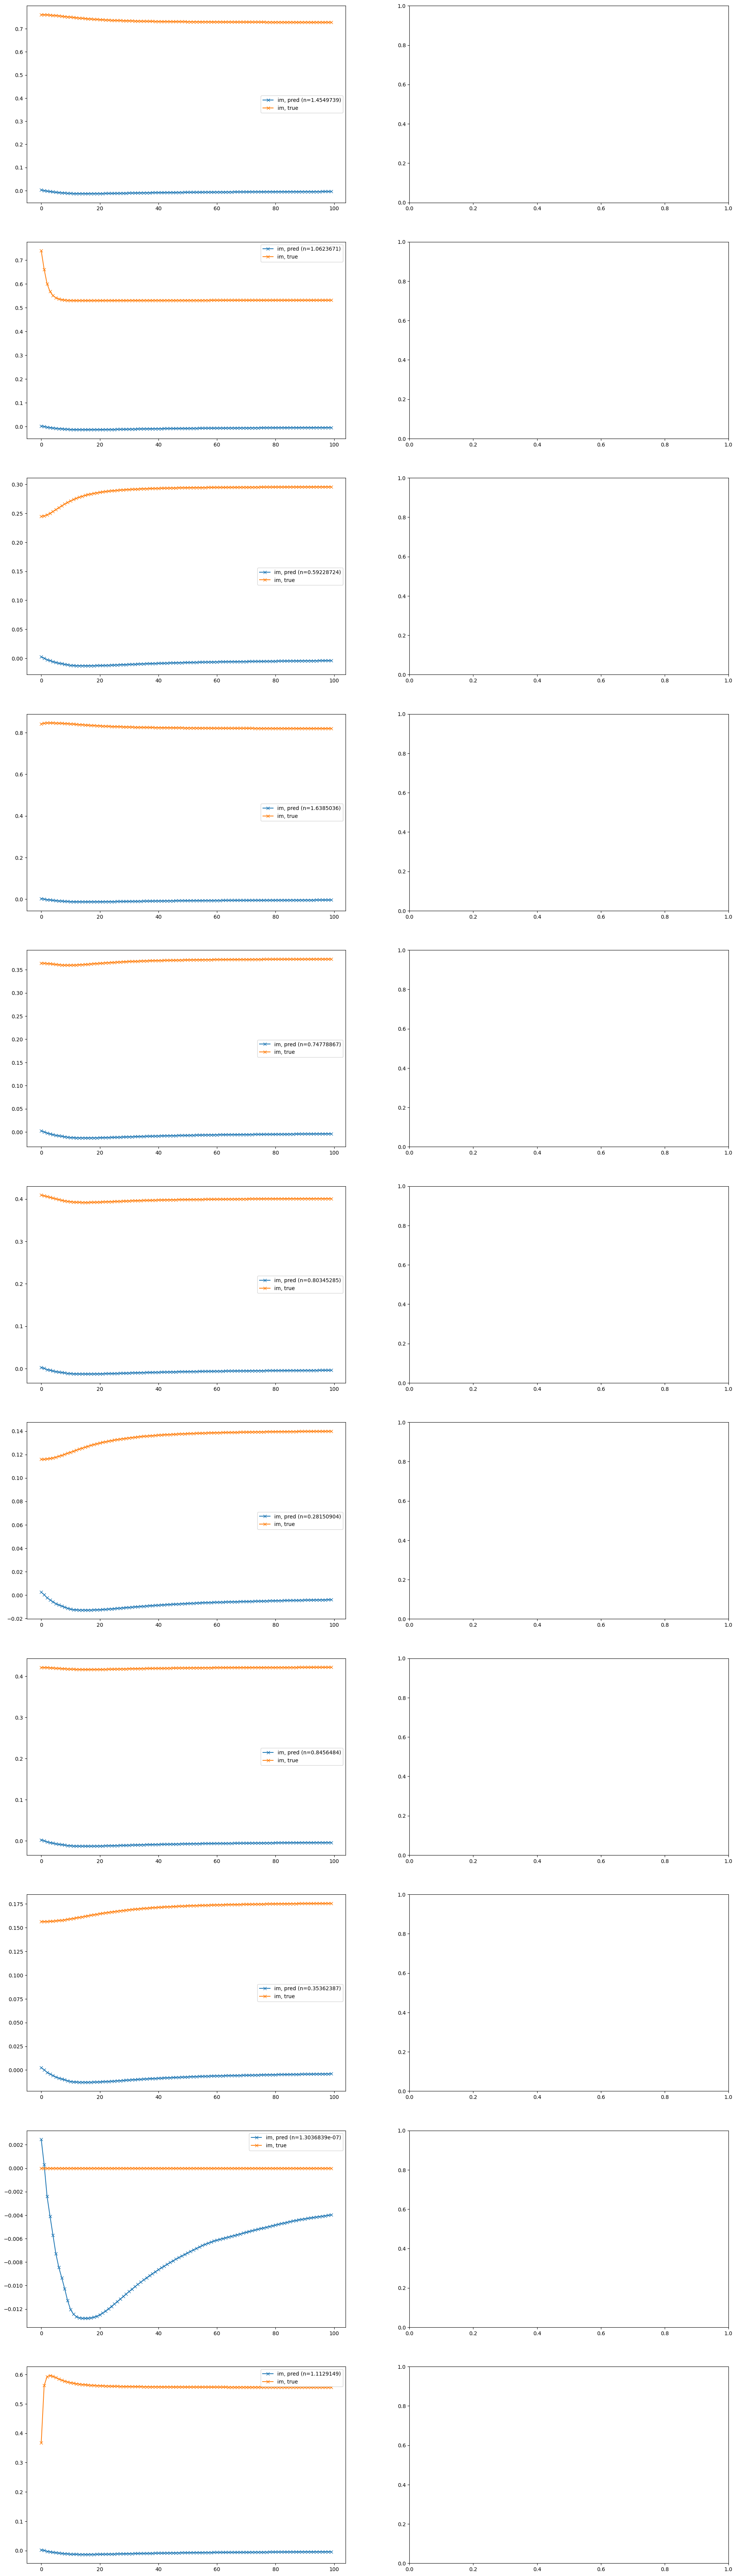

In [31]:
ind_list = [-1, -2, -3, -1501,-1506,-1510,-1511,-1514,-1515, -1517, -1521]

fig,ax = plt.subplots(len(ind_list),2, figsize=(24,8*len(ind_list)))
for i,ind in enumerate(ind_list):
    x_test, y_re_test = model.test_dataset[ind]
    x_test = x_test.to(device).reshape(1,-1)


    ax[i,0].plot(y_re_pred[0,:], marker="x", label="im, pred (n="+str(x_test.detach().numpy()[0,0])+")")
    ax[i,0].plot(y_re_test[:], marker="x", label="im, true")
    ax[i,0].legend()

    #ax[i,1].plot(y_im_pred[0,:], marker="x", label="im, pred")
    #ax[i,1].plot(y_im_test[:], marker="x", label="im, true")
    #ax[i,1].legend()

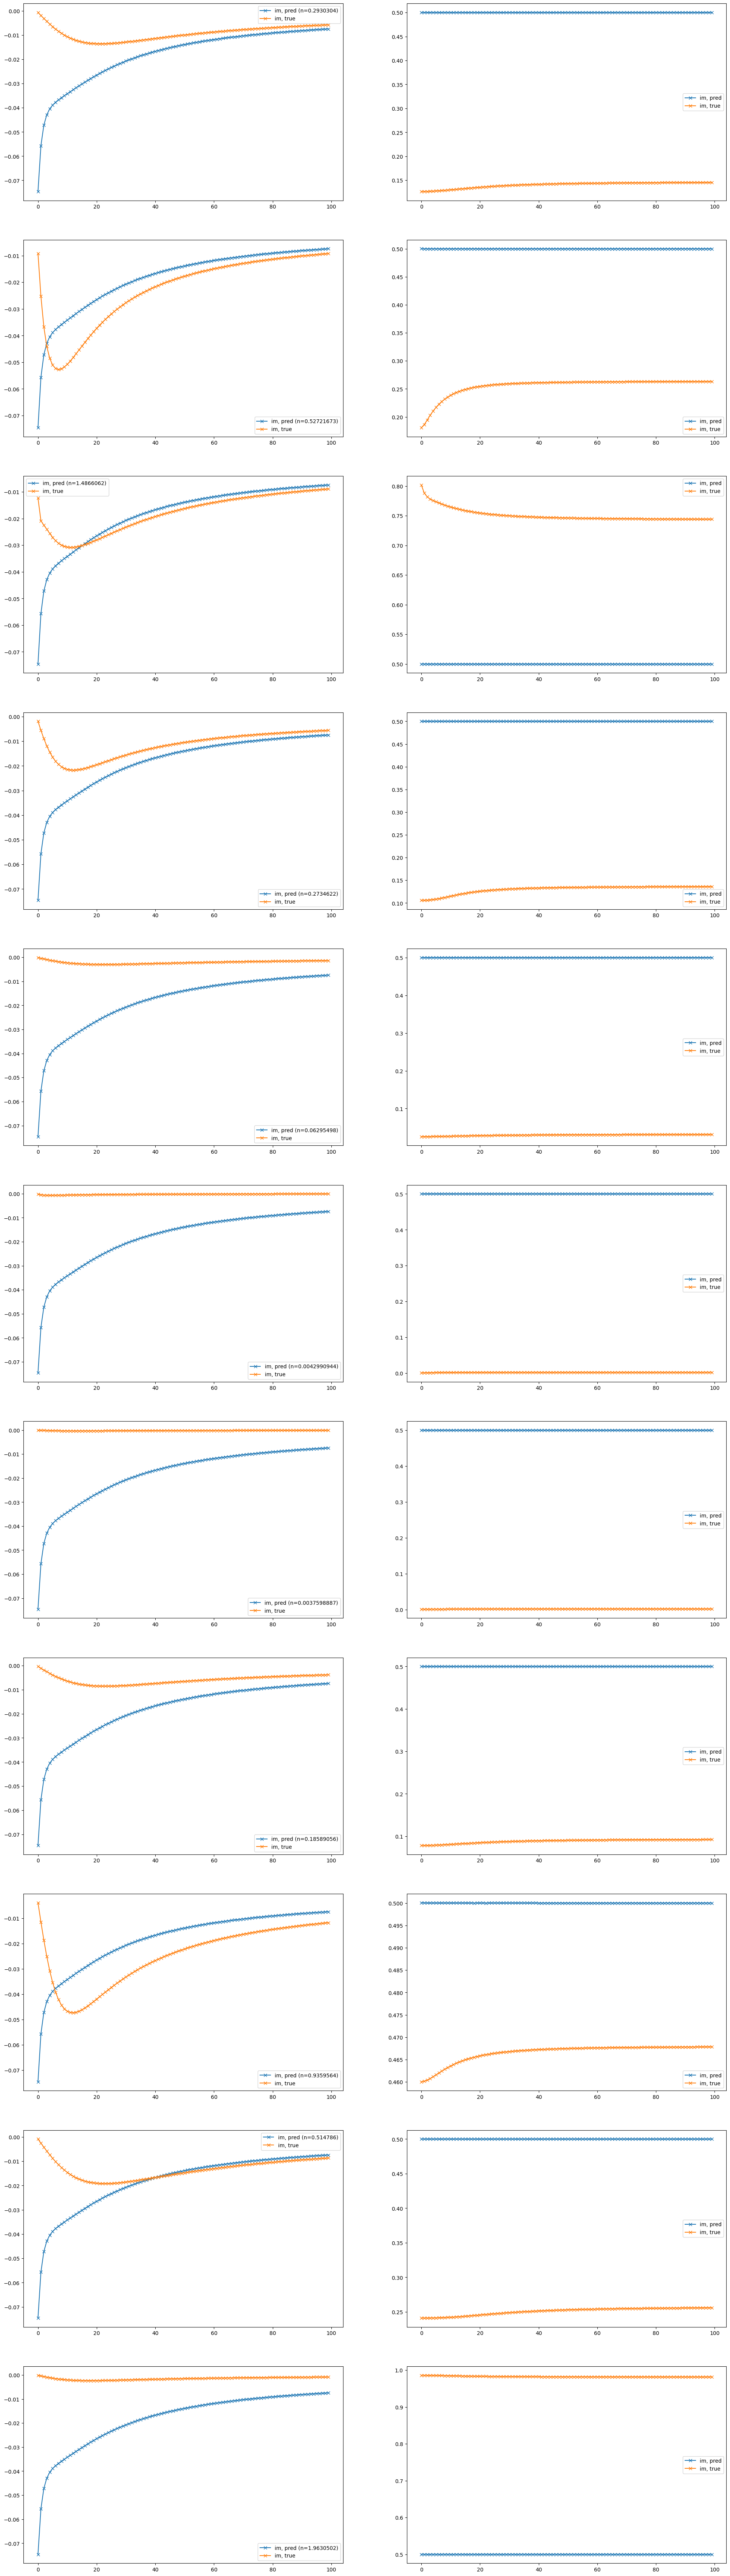

In [18]:
ind_list = [-1, -2, -3, -1501,-1506,-1510,-1511,-1514,-1515, -1517, -1521]

fig,ax = plt.subplots(len(ind_list),2, figsize=(24,8*len(ind_list)))
for i,ind in enumerate(ind_list):
    x_test, y_test = model.test_dataset[ind]
    x_test = x_test.to(device).reshape(1,-1)
    y_pred = model(x_test).detach().numpy()


    ax[i,0].plot(y_pred[0,100:], marker="x", label="im, pred (n="+str(x_test.detach().numpy()[0,0])+")")
    ax[i,0].plot(y_test[100:], marker="x", label="im, true")
    ax[i,0].legend()

    ax[i,1].plot(y_pred[0,0:100], marker="x", label="im, pred")
    ax[i,1].plot(y_test[0:100], marker="x", label="im, true")
    ax[i,1].legend()